In [1]:
import os
import cv2
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras

#define a mapping dict 
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

model = keras.models.load_model('model_hand.h5')


C:\Users\jzeng\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
directory = "Jackie_Handwritten_Data"
filenames = []
for filename in os.listdir(directory):
    if filename.endswith(".png"): 
        mypath = os.path.join(directory, filename)
        filenames.append(mypath)
        continue
    else:
        continue
filenames

['Jackie_Handwritten_Data\\A.png',
 'Jackie_Handwritten_Data\\B.png',
 'Jackie_Handwritten_Data\\C.png',
 'Jackie_Handwritten_Data\\D.png',
 'Jackie_Handwritten_Data\\E.png',
 'Jackie_Handwritten_Data\\F.png',
 'Jackie_Handwritten_Data\\G.png',
 'Jackie_Handwritten_Data\\H.png',
 'Jackie_Handwritten_Data\\I.png',
 'Jackie_Handwritten_Data\\J.png',
 'Jackie_Handwritten_Data\\K.png',
 'Jackie_Handwritten_Data\\L.png',
 'Jackie_Handwritten_Data\\M.png',
 'Jackie_Handwritten_Data\\N.png',
 'Jackie_Handwritten_Data\\O.png',
 'Jackie_Handwritten_Data\\P.png',
 'Jackie_Handwritten_Data\\Q.png',
 'Jackie_Handwritten_Data\\R.png',
 'Jackie_Handwritten_Data\\S.png',
 'Jackie_Handwritten_Data\\T.png',
 'Jackie_Handwritten_Data\\U.png',
 'Jackie_Handwritten_Data\\V.png',
 'Jackie_Handwritten_Data\\W.png',
 'Jackie_Handwritten_Data\\X.png',
 'Jackie_Handwritten_Data\\Y.png',
 'Jackie_Handwritten_Data\\Z.png']

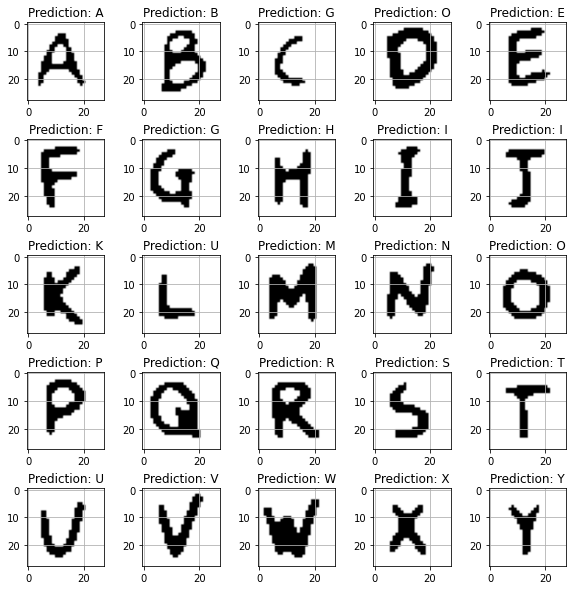

In [33]:
fig, axes = plt.subplots(5,5, figsize=(10,10))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

for i,ax in enumerate(axes):
    #Put the path of the image here.
    img = cv2.imread(filenames[i])
    img_copy = img.copy()

    #Convert BGR representation to RGB and resize the image.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400,440))

    #Convert and resize the copied image to use as a model input.
    img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)

    img_final = cv2.resize(img_thresh, (28,28))
#     img_final =np.reshape(img_gray, (1,28,28,1))
    img_final =np.reshape(img_final, (1,28,28,1))

    img_pred = letters_dict[np.argmax(model.predict(img_final))]
    img_final =np.reshape(img_final, (28,28))

    ax.imshow(img_final, cmap="Greys")
    ax.set_title("Prediction: "+img_pred)
    ax.grid()